# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#Part-1

In [ ]:
X=df[['Mileage']]
y=df[['Price']]

In [ ]:
linreg=linear_model.LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [ ]:
y_pred=linreg.predict(X)

In [ ]:
print("Coefficient: ",linreg.coef_)
print("Intercept: ",linreg.intercept_)

Coefficient:  [[-0.1725205]]
Intercept:  [24764.55900606]


In [ ]:
#Hence linear equation is y=(-0.1725*X)+24764.55

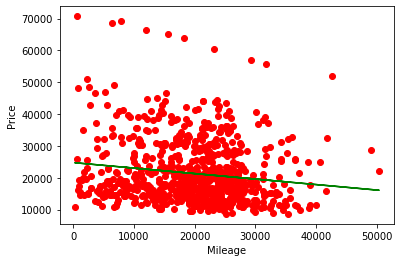

In [ ]:
plt.plot(X,y_pred,color='green')
plt.scatter(X,y,color='r')
plt.xlabel('Mileage')
plt.ylabel('Price');

In [ ]:
linreg.score(X,y)

0.02046344732348926

Hence from r2 score we can say the equation is not good fit for the data

#Part-2

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
X=df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
y=df['Price']


In [ ]:
linear=linear_model.LinearRegression()
linear.fit(X,y)


LinearRegression()

In [ ]:
y_pred=linear.predict(X)

In [ ]:
linear.score(X,y)

0.4462643536728379

In [ ]:
#Due to low r2_score the equation is not good fit for the data

In [ ]:
#Combination of  factors

In [ ]:
factors=df[['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather','Price']]


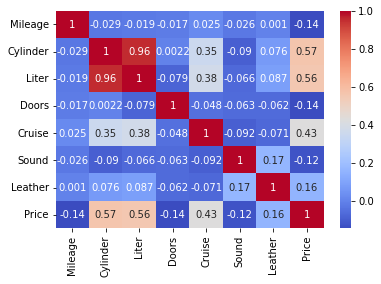

In [ ]:
import seaborn as sns
sns.heatmap(factors.corr(),annot=True,cmap='coolwarm')

From the above plot we observed that

1. Cylinder and Liter has high positive correlation,so we drop Liter column.
2. High Correlation with price in decreasing order are Cylinder,Liter,Cruise,Leather,Mileage,Doors,Sound.

By considering above correlations best combination of factors are as follows: 

In [ ]:
X_new_factors=['Mileage','Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']

#Part-3

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
# for both categoric and numeric features spearman's correlation method is used to find importance.
from scipy import stats
cols=df.columns[1:]
co1=[]
for col in cols:
  sp_coef,p_val=stats.spearmanr(df[col],df['Price'])
  co1.append(sp_coef)

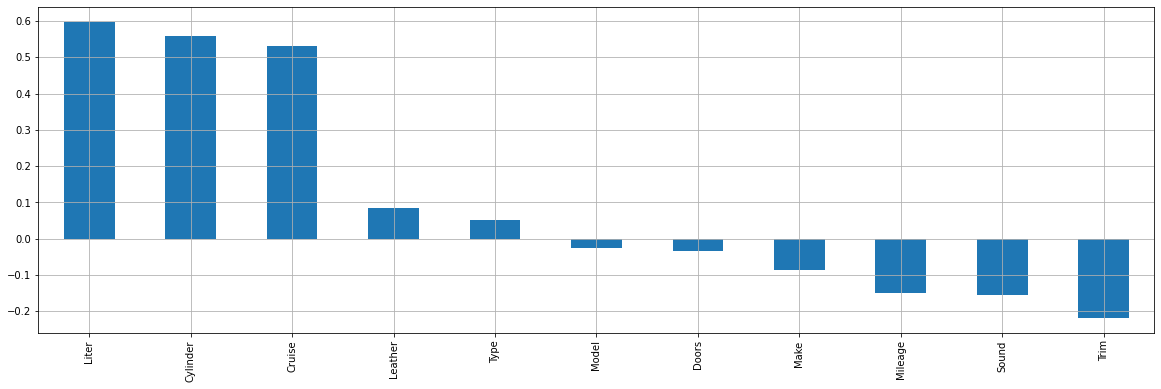

In [ ]:
# barplot representing the increasing order of the categoric feature importance. 
plt.figure(figsize=(20,6))
sp1_vals=pd.Series(co1,index=cols)
sp1_vals.sort_values(ascending=False,inplace=True)
sp1_vals.plot.bar()
plt.grid()

In [ ]:
sp1_vals

Liter       0.597501
Cylinder    0.559934
Cruise      0.531192
Leather     0.085638
Type        0.052501
Model      -0.025333
Doors      -0.034091
Make       -0.087341
Mileage    -0.149057
Sound      -0.156129
Trim       -0.219783
dtype: float64

From above spearman's correlation ,
*  The feature importance is least for factors having spearman's coefficient around zero.i.e:Make,Doors,Model,Type,so they can be dropped.


In [ ]:
df=df.drop(['Make','Doors','Model','Type'],axis=1)

In [ ]:
df.dtypes

Price       float64
Mileage       int64
Trim         object
Cylinder      int64
Liter       float64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
dummy_df=pd.get_dummies(df['Trim'])

In [ ]:
new=pd.concat([df,dummy_df],axis=1)
new.shape

(804, 55)

In [ ]:
new=new.drop(['Trim'],axis=1)

In [ ]:
#Linear Regression model
X=new.iloc[:,1:]
y=new['Price']
linreg3=linear_model.LinearRegression()

In [ ]:
linreg3.fit(X,y)

LinearRegression()

In [ ]:
y_pred=linreg3.predict(X)

In [ ]:
linreg3.score(X,y)

0.8982600619089472

In [ ]:
#Hence the best combination of factors for predicting price high score are as follows:
columns=['Price','Mileage','Cylinder','Liter',	'Cruise',	'Sound',	'Leather','Trim']